# 이미지 인식

MNIST 데이터셋은 손글씨로 이용해 만든 데이터로, 7만개의 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋.

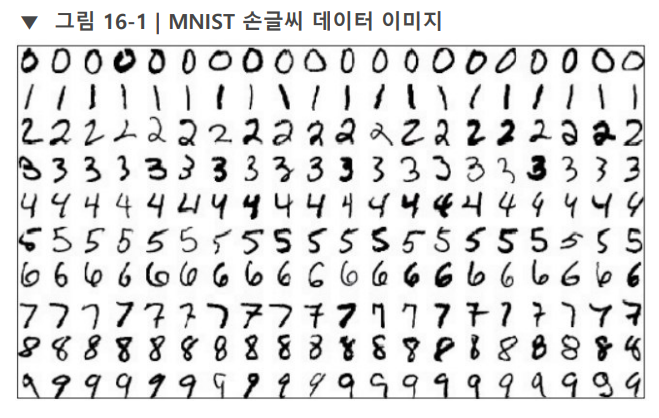

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장
# 7만개 중 학습에 사용될 부분은 train, 테스트에 사용될 부분은 test
# 케라스의 MNIST 데이터는 총 7만개의 이미지 중 6만개를 학습용으로
# 1만개를 테스트용으로 미리 구분해 놓음


# X = 이미지 데이터, y = 이미지에 0~9를 붙인 이름표
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다. 
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 1s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


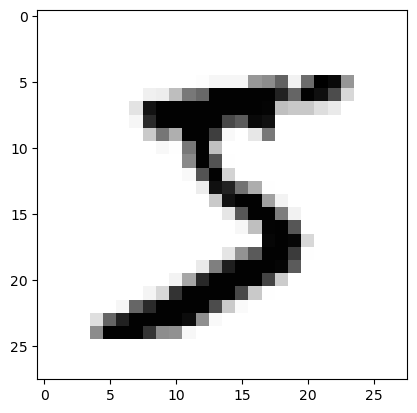

In [2]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

#### 이미지를 인식하는 원리
- 이 이미지는 가로28 * 세로 28 = 총 784개의 픽셀로 이루어져 있음
- 각 픽셀은 밝기 정도에 따라 0부터 255까지 등급이 매겨짐
- 흰색이 0이면 글씨가 들어간 곳은 1~255 중 하나로 채워진 긴 행렬로 이루어진 하나의 집합으로 변환됨

In [3]:
# 이미지는 다시 숫자의 집합으로 바뀌어 학습셋으로 사용됨
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

### 정규화
> 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정

- 속성을 담을 데이터를 딥러닝에 집어넣고 클래스로 예측하는 문제로 바꿈
    - 784개의 속성을 이용해 0~9의 클래스 열 개 중 하나를 맞히는 문제로 변동
- 주어진 가로28 세로28 2차원 배열을 784개의 1차원 배열로 바꾸어야함
- 현재 0 ~255 사이의 값으로 이루어진 값을 0 ~1 사이의 값으로 바꾸어야 함
    - 케라스는 데이터를 0에서 1 사이의 값으로 변환한 후 구동해야 최적의 성능을 보임

In [4]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255
# train과 같은 과정이지만 이렇게 적으면 한번에 적을수있음
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인해 봅니다.
# 0~9의 정수형 값을 갖는 현테 형태에서 0 또는 1로만 이루어진 벡터로 수정
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 딥러닝 기본 프레임 만들기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
# 딥러닝을 실행하고자 하는 프레임을 설정
# 총 784개의 속성이 있고 열 개의 클래스가 있음
# 즉 입력 값(input_dim)이 784개, 은닉층이 512개, 출력이 10개인 모델
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # 모델 최적화를 위한 설정구간입니다.
# MODEL_DIR = './data/model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# 10번 이상 모델 성능이 향상되지 않으면 자동으로 학습 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.(샘플 200개 모두 30번 실행)
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

# 결과 : 학습셋에 대한 오차는 계속해서 줄어듦
# 테스트셋의 과적합이 일어나기 전 학습을 끝냄


Epoch 1: val_loss improved from inf to 0.18647, saving model to ./data/model\MNIST_MLP.hdf5


C:\Users\Playdata\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18647 to 0.13606, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13606 to 0.11182, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11182 to 0.10273, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10273 to 0.09145, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09145 to 0.08956, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08956 to 0.08189, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08189

Epoch 9: val_loss did not improve from 0.08189

Epoch 10: val_loss improved from 0.08189 to 0.08001, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.08001

Epoch 12: val_loss did not improve from 0.08001

Epoch 13: val_loss did not improve from 0.08001

Epoch 14: val_loss did not improve from 0.08001

Epoch 15: val_loss did not 

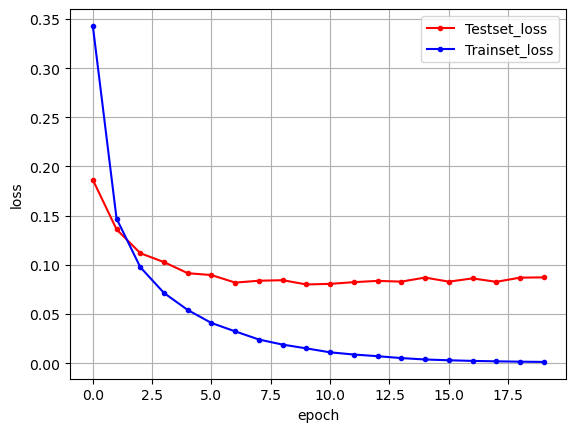

In [8]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
# 학습이 진행될 때 학습셋과 테스트셋의 오차 변화
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 컨볼루션 신경망(CNN)
입력된 이미지에서 다시 한번 특징을 추출하기 위해 커널(슬라이딩 윈도)을 도입하는 기법
- 커널의 각 칸에는 가중치가 들어있음
- 적용된 부분은 원래 있던 값에 가중치 값을 곱하여 새로운 값을 생성함
- 이러한 과정의 반복을 통해 새롭게 만들어진 층을 **컨볼루션(합성곱) 층**이라고 함
- 컨볼루션 층을 만들면 입력 데이터가 가진 특징을 대략적으로 추출해서 학습을 진행할 수 있음
- 이러한 커널을 여러개 만들 경우 여러 개의 컨볼루션 층이 만들어짐
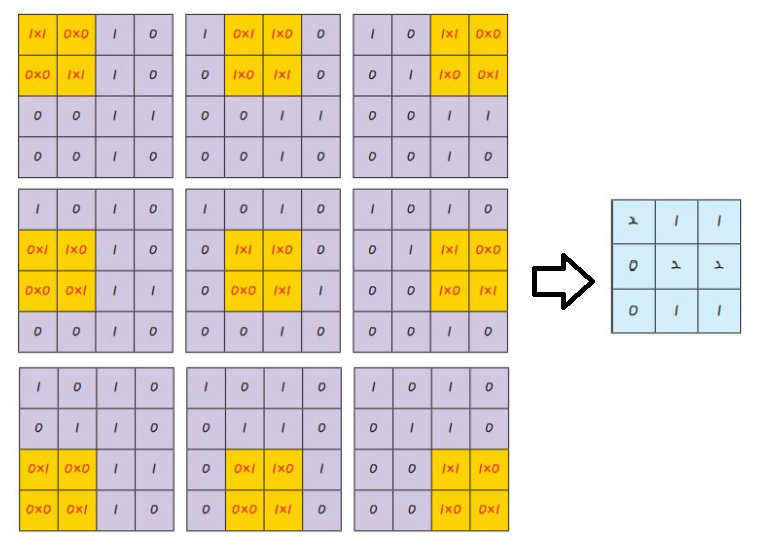

### Conv2D()
컨볼루션 층을 추가하는 함수
1. 첫 번째 인자 : 커널을 몇 개 적용할지
2. kernel_size : 커널의 크기, (행,열)형식으로 정함
3. input_shape : 맨 처음 츠엥 입력되는 값, (행, 열, 색상 또는 흑백)
4. activation : 사용할 활성화 함수를 정의

**컨볼루션 층의 적용**
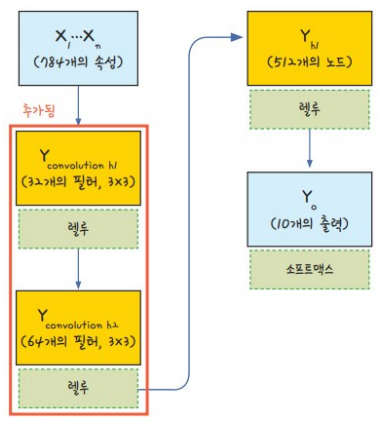

컨볼루션 층을 통해 특징을 도출했지만, 그 결과가 여전히 복잡하면 다시 축소해야 하고, 이를 **풀링(pooling)또는 서브 샘플링(sub sampling)** 이라 함 <br>
<br>
풀링 기법에는 정해진 구역 안에서 최댓값을 뽑아 내는 **맥스 풀링(max pooling)**<br>
평균값을 뽑아내는 **평균 풀링(average pooling)**

#### 맥스 풀링(max pooling)
- 구역을 나누고, 각 구역에서 가장 큰 값을 추출
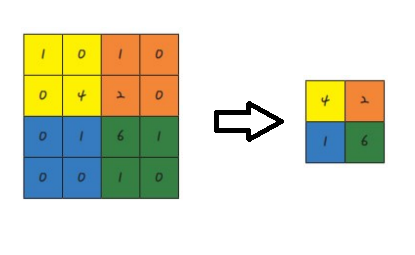
- 이 과정을 통해 불필요한 정보를 간추림

**맥스 풀링 층 추가**
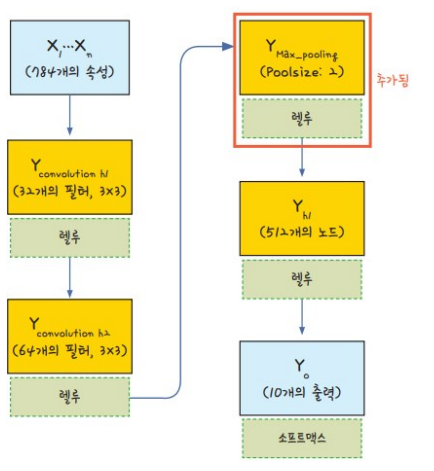

#### 드롭아웃, 플래튼
- **드롭아웃(Drop_out)** : 은닉층에 배치된 노드 중 일부를 임의로 꺼줌
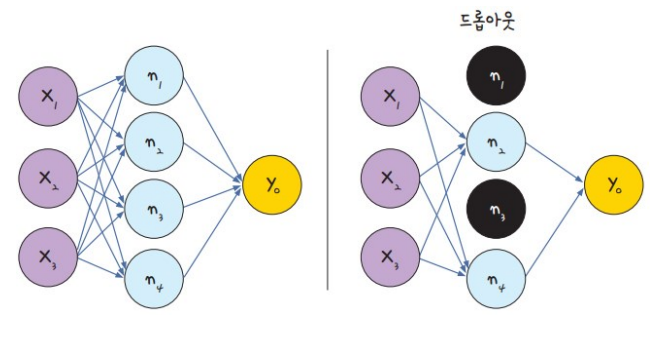
- 뉴럴 네트워크를 끊어서 몇개의 노드를 줄임
- training시 몇 개의 뉴런을 쉬게 함
<br>

- **플래튼(Flatten)** : 컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열로 다루기 때문에 1차원 배열로 바꾸어 주어야 활성화 함수가 있는 층에서 사용할 수 있음

**드롭아웃과 플래튼 추가하기**
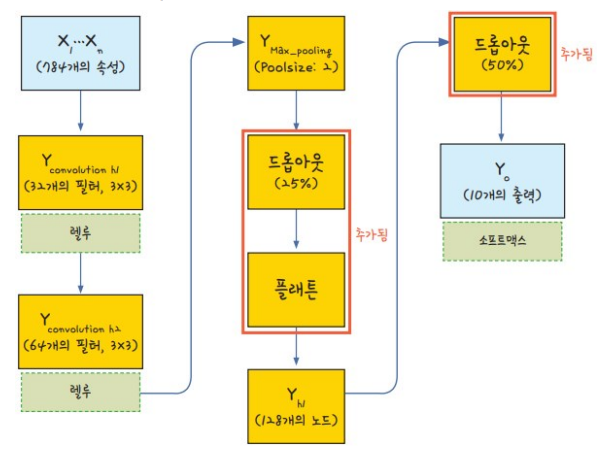

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import os

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = './data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08019, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08019 to 0.06295, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06295 to 0.05024, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05024 to 0.04698, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04698 to 0.04280, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04280

Epoch 7: val_loss improved from 0.04280 to 0.04063, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04063

Epoch 9: val_loss did not improve from 0.04063

Epoch 10: val_loss improved from 0.04063 to 0.04063, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 11: val_loss did not improve from 0.04063

Epoch 12: val_loss improved from 0.04063 to 0.04059, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 13: val_loss did not impro

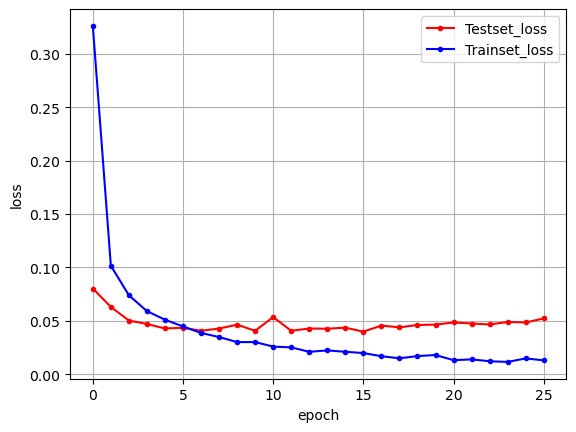

In [11]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
# 학습이 진행될 때 학습셋과 테스트셋의 오차 변화
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

313/313 [==============================] - 4s 13ms/step


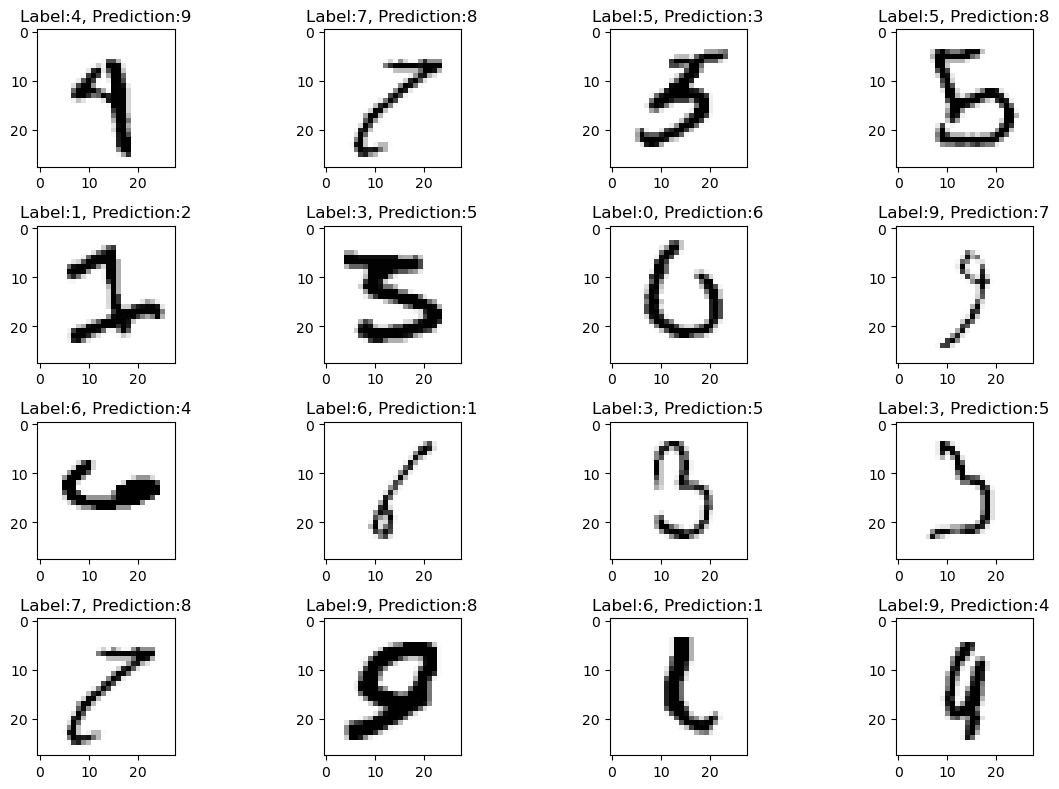

In [12]:
import random
import numpy as np
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)
wrong_result = []
for n in range(0, len(test_labels)):
    # 예측과 실제가 맞지 않으면 -> 리스트에 추가
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
samples = random.choices(population=wrong_result, k=16)
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)
plt.tight_layout()
plt.show()